# Is het verdamping?

In dit experiment is er een verwarmingselement in een met water gevulde maatbeker gestopt. Elke minuut is de temperatuur van het water gemeten. Deze metingen zijn opgeslagen in [tempmetingen.csv](tempmetingen.csv).

Verder is gegeven dat: 
$m_{maatbeker} = 820.8 \mathrm{gr}$  
$m_{maatbeker + water, start} = 1292.9 \mathrm{gr}$  
$m_{maatbeker + water, eind} = 1274.9 \mathrm{gr}$

Het moge duidelijk zijn dat er water is 'verdwenen'. Ook is de eindtemperatuur van het water niet gelijk aan een proces waarbij verdamping en eventuele warmteverliezen niet meegenomen worden. 

```{exercise}
Onderzoek het proces door:
1. De plot van de metingen te maken, inclusief een verwachte trendlijn voor de temperatuur van het water als al de toegevoerde warmte gaat zitten in het water.
2. Bepaal of de totale hoeveelheid toegevoegde energie correspondeert met de opwarming en verdamping van het water, geef daarbij de aannames die je doet.
3. Geef aanbevelingen voor een verbetering van het experiment om (nog) beter het thermodynamische proces te kunnen onderzoeken en beschrijven.
```

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO

# GEGEVEN WAARDEN
m_beker = 820.8
m_beker_water_start = 1292.9
m_beker_water_eind = 1274.9

m_water_start = m_beker_water_start - m_beker
m_water_eind = m_beker_water_eind - m_beker
m_water_verdampt = m_water_start - m_water_eind

# Data inladen vanuit het CSV-bestand
# Je kan dit doen door:
# 1. Het bestand handmatig te kopieën naar de map waar je notebook staat
# 2. Of: gebruik het volledige pad naar het bestand
# 3. Of: copy-paste de data hieronder:

csv_data = """t (min);t (oC)
0;21.2
1;22.6
2;24.0
3;25.2
4;26.6
5;27.9
6;29.3
7;30.8
8;32.2
9;33.5
10;34.7
11;36.0
12;37.2
13;38.5
14;39.8
15;41.1
16;42.5
17;43.9
18;44.9
19;46.0
20;47.1
21;48.2
22;49.4
23;50.5
24;51.6
25;52.7
26;53.9
27;55.0
28;56.1
29;57.1
30;58.0
31;58.9
32;59.9
33;60.8
34;61.6
35;62.5
36;63.4
37;64.2
38;65.0
39;65.8
40;66.6
41;67.4
42;68.0
43;68.7
44;69.3
45;70.0
46;70.6
47;71.2
48;71.7
49;72.2
50;72.7
51;73.2
52;73.7
53;74.1
54;74.5
55;74.9
56;75.3
57;75.6
58;76.0
59;76.2
60;76.6"""

# Parse de CSV data
Data = np.loadtxt(StringIO(csv_data), delimiter=';', skiprows=1)
t = Data[:, 0]  # Tijd in minuten
T = Data[:, 1]  # Temperatuur in °C






21.2°C → 76.6°C (Δ55.4°C in 60 min)


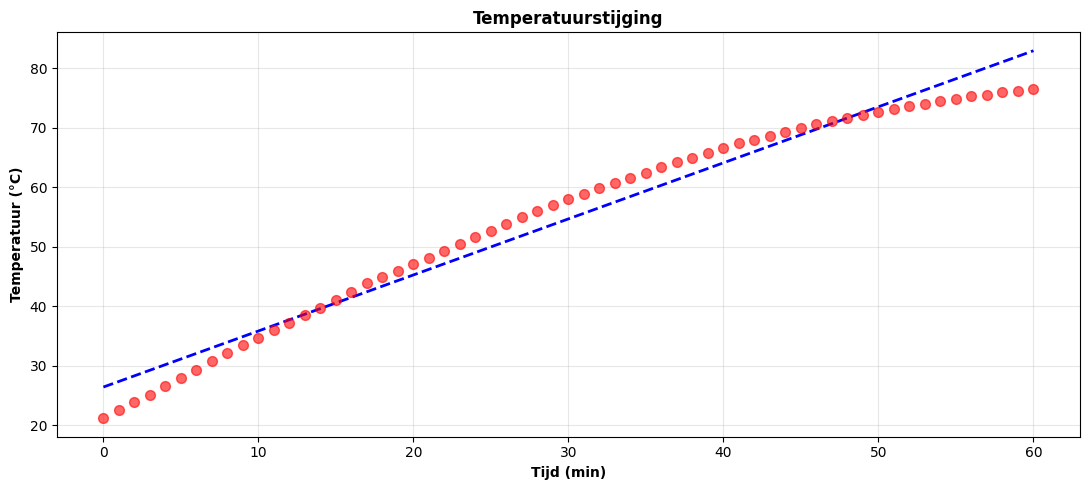


1. Opwarming:
   Water: 109.5 kJ
   Beker: 17.5 kJ
   Subtotaal: 127.0 kJ

2. Verdamping:
   m = 18.0 g
   Q = 43.2 kJ

📊 Totaal:
   E = 170.2 kJ
   t = 60 min
   P = 47 W


In [ ]:
# VRAAG 1: TEMPERATUUR PLOT

if T is not None:
    tijd = np.arange(len(T))
    T_start = T[0]
    T_eind = T[-1]
    delta_T = T_eind - T_start
    
    print(f"\n{T_start:.1f}°C → {T_eind:.1f}°C (Δ{delta_T:.1f}°C in {len(T)-1} min)")
    
    # Lineaire trend
    z = np.polyfit(tijd, T, 1)
    T_fit = np.polyval(z, tijd)
    
    # Plot
    plt.figure(figsize=(11, 5))
    plt.scatter(tijd, T, color='red', s=50, alpha=0.6, zorder=3)
    plt.plot(tijd, T_fit, 'b--', lw=2)
    plt.xlabel('Tijd (min)', fontweight='bold')
    plt.ylabel('Temperatuur (°C)', fontweight='bold')
    plt.grid(alpha=0.3)
    plt.title('Temperatuurstijging', fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    delta_T = 70
    print(f"Geen data - gebruik Δ{delta_T}°C als voorbeeld")




c_water = 4186 #aaname
c_beker = 385 #aanname
L_vap = 2.4e6 #aanname

# Opwarming
Q_w = (m_water_start/1000) * c_water * delta_T
Q_b = (m_beker/1000) * c_beker * delta_T
Q_opw = Q_w + Q_b

print(f"\n1. Opwarming:")
print(f"   Water: {Q_w/1e3:.1f} kJ")
print(f"   Beker: {Q_b/1e3:.1f} kJ")
print(f"   Subtotaal: {Q_opw/1e3:.1f} kJ")

# Verdamping
Q_verd = (m_water_verdampt/1000) * L_vap
print(f"\n2. Verdamping:")
print(f"   m = {m_water_verdampt:.1f} g")
print(f"   Q = {Q_verd/1e3:.1f} kJ")

# Totaal
Q_tot = Q_opw + Q_verd
t_min = (len(T)-1) if T is not None else 30
P_avg = Q_tot / (t_min * 60)

print(f"\n📊 Totaal:")
print(f"   E = {Q_tot/1e3:.1f} kJ")
print(f"   t = {t_min} min")
print(f"   P = {P_avg:.0f} W")




Eventuele verbeteringen van het experiment:
- Vaker het gewicht meten, om te bepalen hoeveel water er is verdampt.
- Het experiment vaker uitvoeren.
- Meten hoeveel energie je toevoegd aan het water.
- Zorgen dat de soortelijke warmte van de maatbeker bekend is.
